<a href="https://colab.research.google.com/github/zzznavarrete/astropy-playground/blob/master/01_Intro_poliastro_and_astropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerías

In [0]:
pip install poliastro

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.ion() # To inmediatly show plots

from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit


plt.style.use("seaborn") # Recommended

# Primeros pasos

In [0]:
# Definiendo una órbita.
r = [-6045, -3490, 2500] * u.km # Vector posicion
v = [-3.457, 6.618, 2.533] * u.km / u.s # Vector velocidad
# r <-- kilometers

In [0]:
# Creando objeto orbit. 
ss = Orbit.from_vectors(Earth, r, v)
# Asume que el plano de referencia es el ecuador.
# Es una orbita que tiene X = altura minima, Y = Altura máxina, Z = Inclinación sobre plano de referencia

In [0]:
# Si no le defino un tiempo, astropy asume la sgte fecha
ss.epoch.iso

'2000-01-01 12:00:00.000'

In [0]:
# Podemos definirle un tiempo mediente el siguiente import
from astropy.time import Time 

In [0]:
# Le defino la misma órbita anterior pero 
ss = Orbit.from_vectors(Earth, r, v, epoch=Time.now())

7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch 2020-05-22 03:39:49.150850 (UTC)

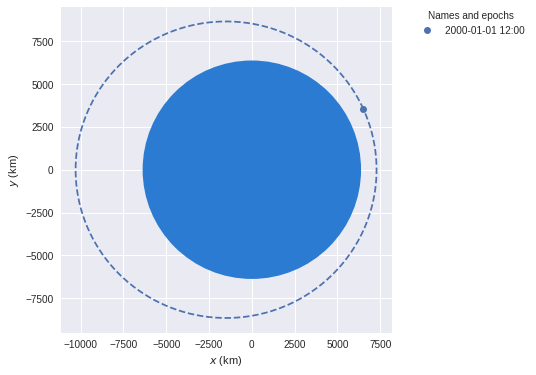

In [0]:
# Dibujando la órbita
ss.plot()

In [0]:
# Definiendo un objeto vía parámetros. 
'''
Semimajor axis (𝑎).

Eccentricity (𝑒).

Inclination (𝑖).

Right ascension of the ascending node (Ω).

Argument of pericenter (𝜔).

True anomaly (𝜈).
'''
# Data for Mars at J2000 from JPL HORIZONS
a = 1.523679 * u.AU
ecc = 0.093315 * u.one
inc = 1.85 * u.deg
raan = 49.562 * u.deg
argp = 286.537 * u.deg
nu = 23.33 * u.deg

orb = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)

orb


1 x 2 AU x 1.9 deg (HCRS) orbit around Sun (☉) at epoch J2000.000 (TT)

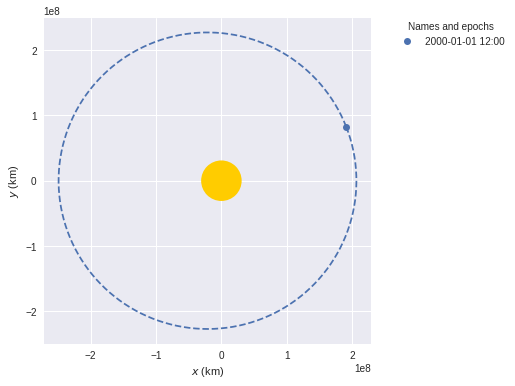

In [0]:
# Órbita al rededor del sol, de marte
orb.plot()

# Propagación
### Avanzar en el tiempo
#
Problema del valor inicial. Yo se de donde parto, yo se cuanto me voy a mover por lo tanto, quiero saber donde voy a estar.

In [0]:
# Importando data de ejemplo de la ISS
from poliastro.examples import iss

In [0]:
# Imprimiendo datos de la ISS
iss

6772 x 6790 km x 51.6 deg (GCRS) orbit around Earth (♁) at epoch 2013-03-18 12:00:00.000 (UTC)

In [0]:
# Si lo avanzamos 30 minutos en el tiempo la orbita será la misma porque RECORDAR: La orbita no cambia 
# (lo que si cambia es la hora btw)
iss.propagate(30 * u.min)

6772 x 6790 km x 51.6 deg (GCRS) orbit around Earth (♁) at epoch 2013-03-18 12:30:00.000 (UTC)

In [0]:
 # La anomalía verdadera SI cambia
print("Propagación(0 min) = ",iss.nu / u.rad)
print("Propagación(30 min) = ",iss.propagate(30 * u.min).nu / u.rad)

Propagación(0 min) =  0.8132502092308282
Propagación(30 min) =  2.847346481536867


# Maniobras

In [0]:
from poliastro.maneuver import Maneuver


In [0]:
ss_i = Orbit.circular(Earth, alt=700 * u.km)
ss_i

7078 x 7078 km x 0.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

In [0]:
# Transferencia de Hohmann entre un punto y otro.
'''
Transferir entre 2 órbitas circulares, gastanto la mínima cantidad de combustible
'''
# Maniobra típica: Ir de órbita baja (o de aparcamiento) a órbita geoestacionaria
hoh = Maneuver.hohmann(ss_i,36000 * u.km)

In [0]:
# Obteniendo el coste total de la maniobra, está expresado en km/s
hoh.get_total_cost()

<Quantity 3.6173999 km / s>

In [0]:
# Obteniendo el tiempo en horas
hoh.get_total_time().to(u.h)

<Quantity 4.36937032 h>

# Lambert problem

Ahora empiezo aquí y quiero terminar allí. ¿Cómo llego?

In [0]:
# Simulando la orbita de la misión curiosity de NASA

In [0]:
# Fecha de lanzamiento y llegada
date_launch = Time('2011-11-26 15:02', scale='utc')
date_arrival = Time('2012-08-06 05:17', scale='utc')

In [0]:
# Órbita de lanzamiento y llegada
ss0 = Orbit.from_body_ephem(Earth, date_launch)
ssf = Orbit.from_body_ephem(Mars, date_arrival)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Orbit.from_body_ephem is deprecated and will be removed in a future release, use Ephem.from_body instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2011-11-26 15:03:06.183. Use Time(..., scale='tdb') instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

Orbit.from_body_ephem is deprecated and will be removed in a future release, use Ephem.from_body instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2012-08-06 05:18:07.183. Use Time(..., scale='tdb') instead.



In [0]:
# Tiempo total de vuelo
tof = date_arrival - date_launch
tof

<TimeDelta object: scale='tai' format='jd' value=253.59376157407408>

In [0]:
# 
from poliastro import iod

In [0]:
# parámetro orbitacional del sol, posicion inicial, posicion final y tiempo de vuelo.
(v0, v),= iod.lambert(Sun.k, ss0.r, ssf.r, tof)
print("Velocidad inicial =",v0)
print("Velociadad final=", v)

Velocidad inicial = [-29.29122325  14.53256824   5.41593207] km / s
Velociadad final= [ 17.61580401 -10.99860504  -4.20763857] km / s
